#### By: Ethan Rebello
###### This is my first self-made model - any reccomendations welcome and appreciated
# House Price Prediction Model
### Using data from https://www.kaggle.com/datasets/dansbecker/melbourne-housing-snapshot


# Section 1 - Data Structure

## Basic import and data review

In [1]:
import pandas as pd 
df = pd.read_csv('melb_data.csv')

Post code looks like a continous var, but it is not. It doesn't increment, and larger numbers mean nothing.

Building area and year build are often missing. All other variables are always present.

In [2]:
df.head()

,Suburb,Rooms,Type,Method,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Regionname,Propertycount,Price
0,Abbotsford,2,h,S,3/12/2016,2.5,3067,2,1,1.0,202,NaN,NaN,-37.7996,144.9984,Northern Metropolitan,4019,1480000
1,Abbotsford,2,h,S,4/2/2016,2.5,3067,2,1,0.0,156,79.0,1900.0,-37.8079,144.9934,Northern Metropolitan,4019,1035000
2,Abbotsford,3,h,SP,4/3/2017,2.5,3067,3,2,0.0,134,150.0,1900.0,-37.8093,144.9944,Northern Metropolitan,4019,1465000
3,Abbotsford,3,h,PI,4/3/2017,2.5,3067,3,2,1.0,94,NaN,NaN,-37.7969,144.9969,Northern Metropolitan,4019,850000
4,Abbotsford,4,h,VB,4/6/2016,2.5,3067,3,1,2.0,120,142.0,2014.0,-37.8072,144.9941,Northern Metropolitan,4019,1600000


In [3]:
df.describe()

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Price
count,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000,1.358000e+04
mean,2.937997,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378,1.075684e+06
std,0.955748,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772,6.393107e+05
min,1.000000,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000,8.500000e+04
25%,2.000000,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000,6.500000e+05
50%,3.000000,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000,9.030000e+05
75%,3.000000,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000,1.330000e+06
max,10.000000,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000,9.000000e+06


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
list(df)

['Suburb',
 'Rooms',
 'Type',
 'Method',
 'Date',
 'Distance',
 'Postcode',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'Lattitude',
 'Longtitude',
 'Regionname',
 'Propertycount',
 'Price']

In [6]:
import numpy as np


# Section 2 - Preprocessing

## Data splittage happens here

Seperate off categorical (cat) and continuous (cont) variables, as the cont will need to be scaled, and the categorical variables will need to be one hot encoded.

In [7]:
df_cont_only = df.drop(['Suburb', 'Type', 'Method', 'Postcode','Date', 'Regionname', 'Price'], axis=1)
# Date will remain unused. 
df_date_only = df['Date'] 
df_cat_only = df.iloc[:, np.r_[0,2,3,6,15]]
# y is our result dataset, aka what we are imitating
y = df['Price']

df_melt = pd.melt(df_cont_only)

In [8]:
y.head()

0    1480000
1    1035000
2    1465000
3     850000
4    1600000
Name: Price, dtype: int64

In [9]:
df_cont_only.head()

,Rooms,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,2,2.5,2,1,1.0,202,NaN,NaN,-37.7996,144.9984,4019
1,2,2.5,2,1,0.0,156,79.0,1900.0,-37.8079,144.9934,4019
2,3,2.5,3,2,0.0,134,150.0,1900.0,-37.8093,144.9944,4019
3,3,2.5,3,2,1.0,94,NaN,NaN,-37.7969,144.9969,4019
4,4,2.5,3,1,2.0,120,142.0,2014.0,-37.8072,144.9941,4019


In [10]:
df_cat_only.head()

,Suburb,Type,Method,Postcode,Regionname
0,Abbotsford,h,S,3067,Northern Metropolitan
1,Abbotsford,h,S,3067,Northern Metropolitan
2,Abbotsford,h,SP,3067,Northern Metropolitan
3,Abbotsford,h,PI,3067,Northern Metropolitan
4,Abbotsford,h,VB,3067,Northern Metropolitan


In [11]:
df_date_only.head()

0    3/12/2016
1     4/2/2016
2     4/3/2017
3     4/3/2017
4     4/6/2016
Name: Date, dtype: object

## One Hot Encoding to transform categorical variables

In [12]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
df_cat_ohe = pd.DataFrame(ohe.fit_transform(df_cat_only).toarray(), columns=ohe.get_feature_names_out())

In [13]:
ohe.categories_

[array(['Abbotsford', 'Aberfeldie', 'Airport West', 'Albanvale',
        'Albert Park', 'Albion', 'Alphington', 'Altona', 'Altona Meadows',
        'Altona North', 'Ardeer', 'Armadale', 'Ascot Vale', 'Ashburton',
        'Ashwood', 'Aspendale', 'Aspendale Gardens', 'Attwood',
        'Avondale Heights', 'Bacchus Marsh', 'Balaclava', 'Balwyn',
        'Balwyn North', 'Bayswater', 'Bayswater North', 'Beaconsfield',
        'Beaconsfield Upper', 'Beaumaris', 'Bellfield', 'Bentleigh',
        'Bentleigh East', 'Berwick', 'Black Rock', 'Blackburn',
        'Blackburn North', 'Blackburn South', 'Bonbeach', 'Boronia',
        'Box Hill', 'Braybrook', 'Briar Hill', 'Brighton', 'Brighton East',
        'Broadmeadows', 'Brookfield', 'Brooklyn', 'Brunswick',
        'Brunswick East', 'Brunswick West', 'Bulleen', 'Bullengarook',
        'Bundoora', 'Burnley', 'Burnside', 'Burnside Heights', 'Burwood',
        'Burwood East', 'Cairnlea', 'Camberwell', 'Campbellfield',
        'Canterbury', 'Carlton

In [14]:
df_cat_ohe.head()

,Suburb_Abbotsford,Suburb_Aberfeldie,Suburb_Airport West,Suburb_Albanvale,Suburb_Albert Park,Suburb_Albion,Suburb_Alphington,Suburb_Altona,Suburb_Altona Meadows,Suburb_Altona North,...,Postcode_3976,Postcode_3977,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## Iterative Imputation

In [15]:
X_missing_values = pd.concat([df_cont_only,df_cat_ohe],axis=1)

In [16]:
from sklearn.impute import KNNImputer

In [17]:
knn = KNNImputer(n_neighbors=2)
X_sparse = knn.fit_transform(X_missing_values)
'''
Important note: Technically, you should do this before you add the OHE values, as you don't want to have .5s in the dummy columns,
but we aren't missing any values in any of the categorical data, so the order of these steps does not matter.
'''

"\nImportant note: Technically, you should do this before you add the OHE values, as you don't want to have .5s in the dummy columns,\nbut we aren't missing any values in any of the categorical data, so the order of these steps does not matter.\n"

## Train test splittage

In [18]:
X_sparse

array([[2. , 2.5, 2. , ..., 0. , 0. , 0. ],
       [2. , 2.5, 2. , ..., 0. , 0. , 0. ],
       [3. , 2.5, 3. , ..., 0. , 0. , 0. ],
       ...,
       [3. , 6.8, 3. , ..., 0. , 1. , 0. ],
       [4. , 6.8, 4. , ..., 0. , 1. , 0. ],
       [4. , 6.3, 4. , ..., 0. , 1. , 0. ]])

In [19]:
X = pd.DataFrame(X_sparse,columns=list(X_missing_values))
X.head()

,Rooms,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,...,Postcode_3976,Postcode_3977,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,2.0,2.5,2.0,1.0,1.0,202.0,144.0,1900.0,-37.7996,144.9984,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2.0,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,3.0,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,-37.8093,144.9944,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3.0,2.5,3.0,2.0,1.0,94.0,115.0,1946.0,-37.7969,144.9969,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,4.0,2.5,3.0,1.0,2.0,120.0,142.0,2014.0,-37.8072,144.9941,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## unscaled data plot, demonstrates clear need for scaling

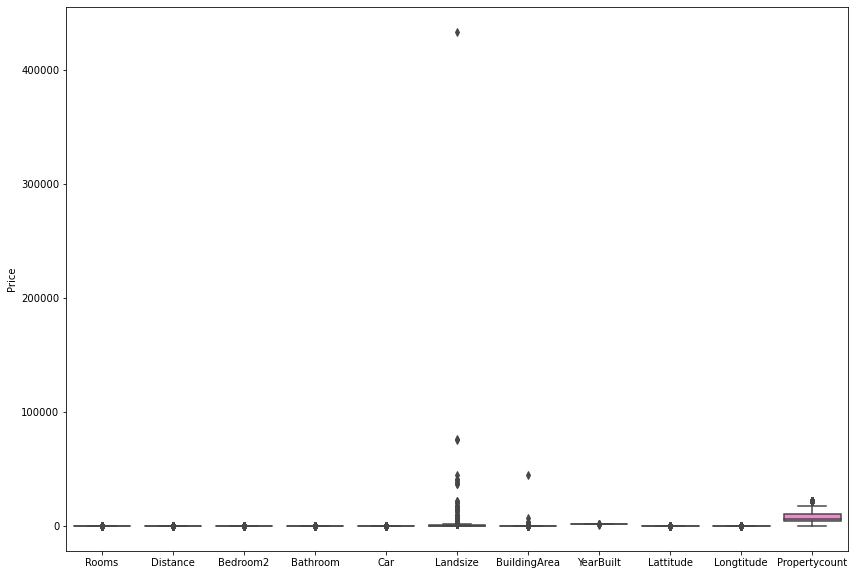

In [21]:
fig, ax = plt.subplots(figsize=(14,10))
ax = sns.boxplot(x="variable",y="value",data=df_melt)
ax.set_xlabel("")
ax.set_ylabel("Price")
plt.show()

## Scaling process

In [22]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
#Here we duplicate X_train, so we can transform select columns and set that into a distinct variable, X_train_scaled
X_train_scaled = X_train
cont_cols = ['Rooms','Distance','Bedroom2','Bathroom','Car','Landsize','BuildingArea','YearBuilt','Lattitude','Longtitude', 'Propertycount']
X_train_scaled[cont_cols] = ss.fit_transform(X_train[cont_cols])

In [23]:
df_scaled_melt = pd.melt(pd.concat([X_train_scaled[cont_cols]], axis = 1))

## Scaled data plot, displays skew but is much better

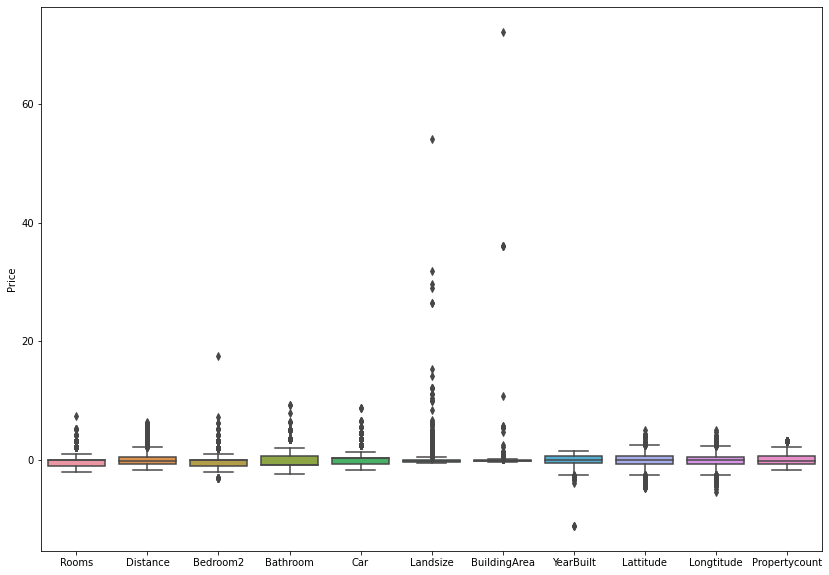

In [24]:
fig, ax = plt.subplots(figsize=(14,10))
ax = sns.boxplot(x="variable",y="value",data=df_scaled_melt)
ax.set_xlabel("")
ax.set_ylabel("Price")
plt.show()

# Section 3 - Model Training

## Model Creation

In [25]:
from sklearn.linear_model import Ridge
ridge = Ridge()

## Cross Validation for Hyper-parameter alpha

In [26]:
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': np.logspace(-3,8,100)}
grid = GridSearchCV(ridge, param_grid, cv=10, return_train_score=True)
grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-03, 1.29154967e-03, 1.66810054e-03, 2.15443469e-03,
       2.78255940e-03, 3.59381366e-03, 4.64158883e-03, 5.99484250e-03,
       7.74263683e-03, 1.00000000e-02, 1.29154967e-02, 1.66810054e-02,
       2.15443469e-02, 2.78255940e-02, 3.59381366e-02, 4.64158883e-02,
       5.99484250e-02, 7.74263683e-02, 1.00000000e-01, 1...
       2.78255940e+05, 3.59381366e+05, 4.64158883e+05, 5.99484250e+05,
       7.74263683e+05, 1.00000000e+06, 1.29154967e+06, 1.66810054e+06,
       2.15443469e+06, 2.78255940e+06, 3.59381366e+06, 4.64158883e+06,
       5.99484250e+06, 7.74263683e+06, 1.00000000e+07, 1.29154967e+07,
       1.66810054e+07, 2.15443469e+07, 2.78255940e+07, 3.59381366e+07,
       4.64158883e+07, 5.99484250e+07, 7.74263683e+07, 1.00000000e+08])},
             return_train_score=True)

In [27]:
grid.best_score_

0.6687324296306203

In [28]:
grid.best_params_

{'alpha': 4.6415888336127775}

In [29]:
alphas = np.logspace(-3,8,100)
coef=[]
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train_scaled, y_train)
    coef.append(ridge.coef_)

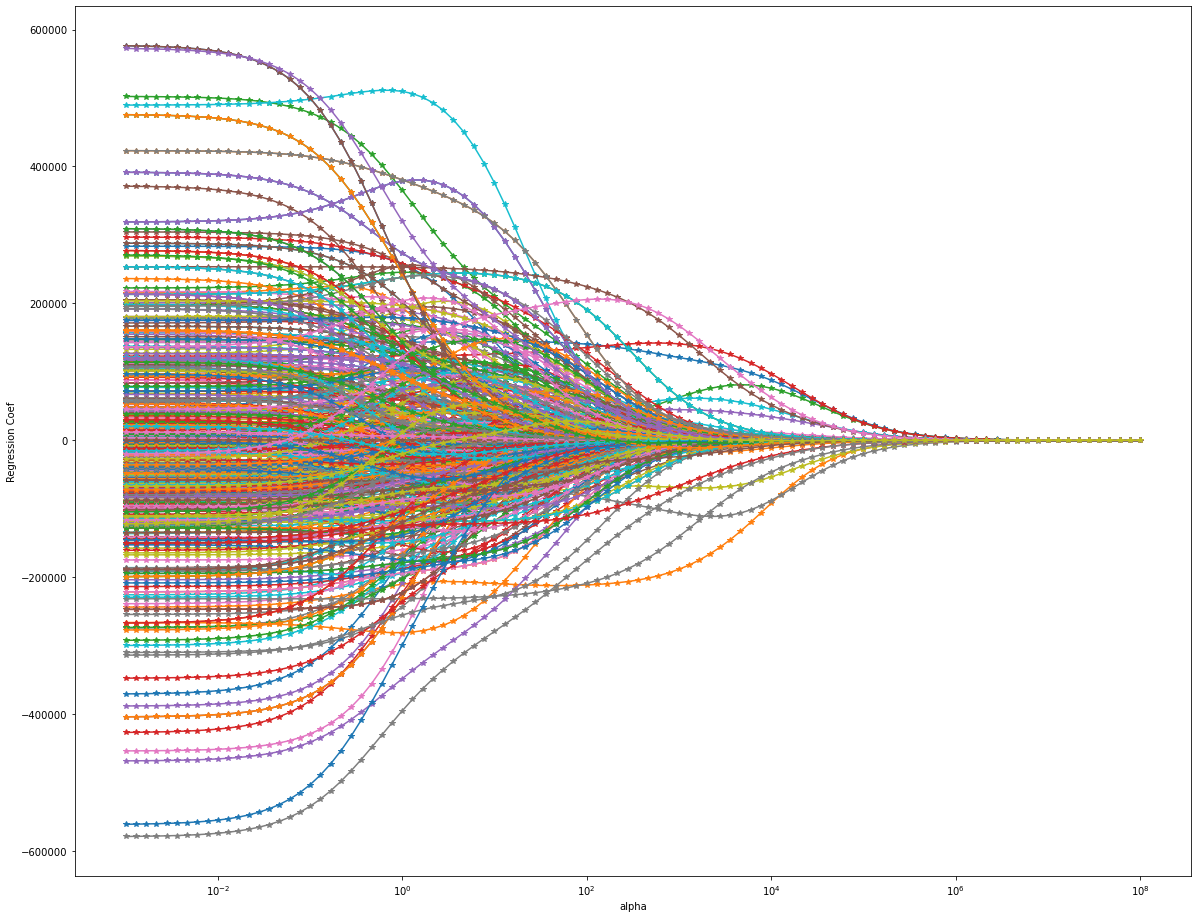

In [30]:
fig, ax = plt.subplots(figsize=(20,16))
ax.plot(alphas, coef,marker='*')
ax.set_xlabel('alpha')
ax.set_ylabel('Regression Coef')
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())

plt.show()

## Best model isolation

In [31]:
best_model = grid.best_estimator_

In [32]:
grid.best_params_

{'alpha': 4.6415888336127775}

# Section 4 - Scoring and Tests

## r2 score calculations

In [33]:
best_model.score(X_train_scaled, y_train)

0.680056472407123

In [34]:
X_test_cont = X_test[cont_cols]
X_test_cont_scaled = ss.transform(X_test_cont)

In [35]:
X_test_cat = X_test.drop(cont_cols,axis=1)
X_test_cont_scaled_df = pd.DataFrame(X_test_cont_scaled, columns=cont_cols).reset_index()
X_test_scaled = pd.concat([X_test_cont_scaled_df, X_test_cat.reset_index()], axis=1)
X_test_scaled = X_test_scaled.drop(['index'],axis=1)

In [36]:
best_model.score(X_test_scaled, y_test)

0.6781560207896759

## Mean Squared Error


In [37]:
from sklearn.metrics import mean_squared_error

In [38]:
y_pred = best_model.predict(X_test_scaled)

In [39]:
np.sqrt(mean_squared_error(y_test, y_pred))

357548.44061319594

## Error distribution on test set


In [40]:
error = y_test - y_pred

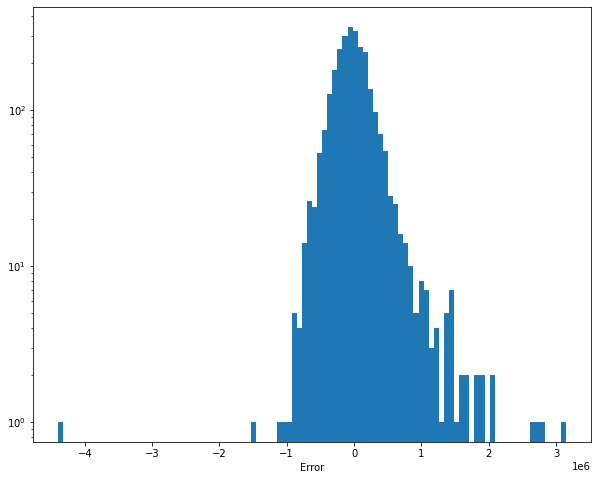

In [41]:
fig, ax = plt.subplots(figsize=(10,8))
ax.hist(error, bins=100)
ax.set_xlabel('Error')
ax.set_yscale('log')
plt.show()

## Prediction comparison 

In [42]:
data_pred_df = pd.DataFrame({'Actual value': y_test, 'Predicted': y_pred}).reset_index(drop=True)

<AxesSubplot:>

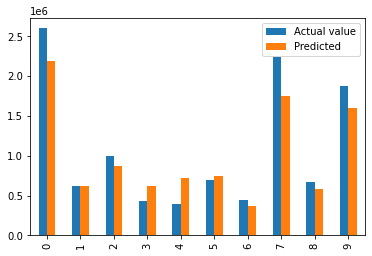

In [43]:
data_pred_df.head(10).plot(kind='bar')

<AxesSubplot:>

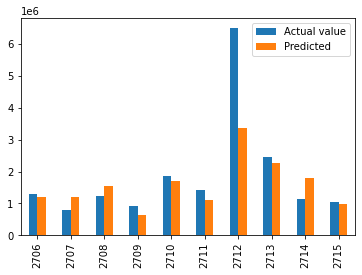

In [44]:
data_pred_df.tail(10).plot(kind='bar')

(0.0, 7191983.054826878)

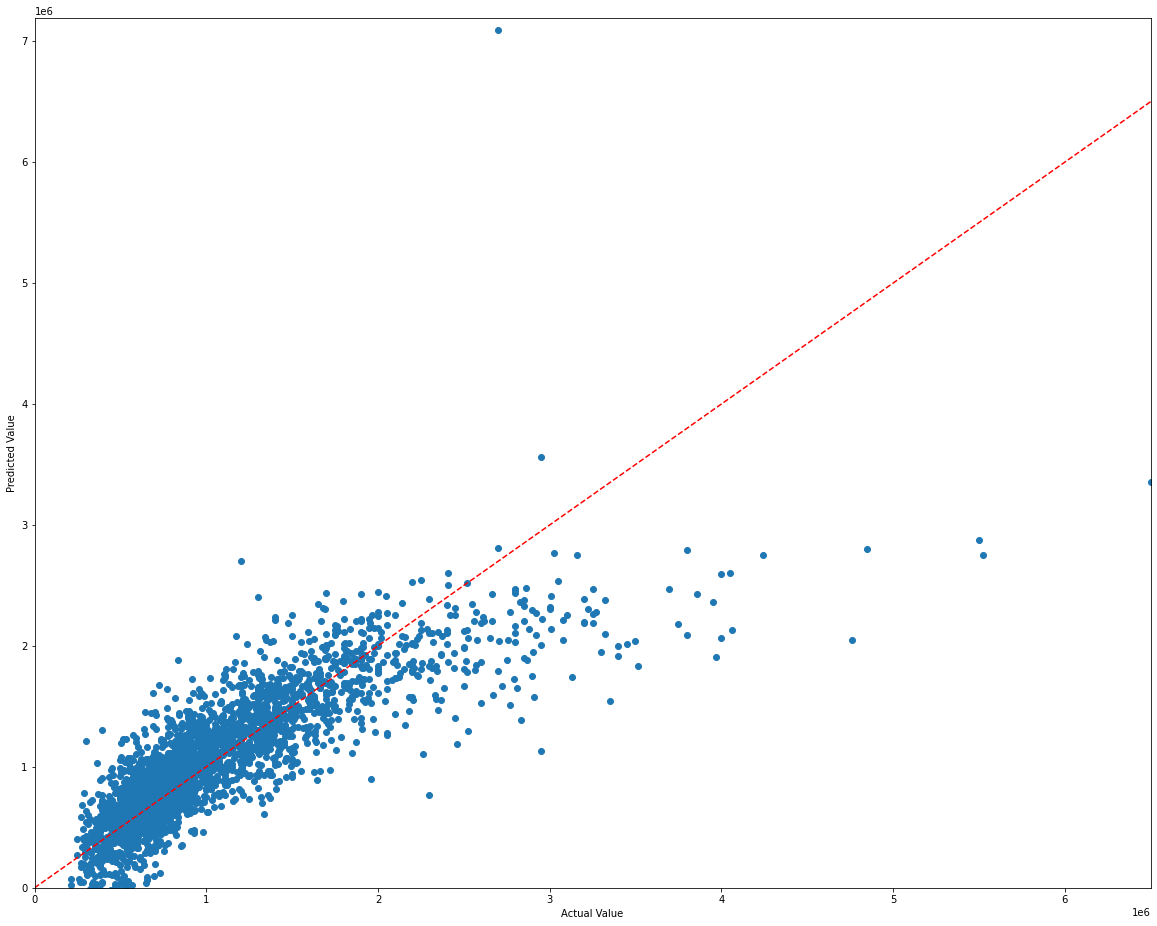

In [45]:
fig, ax = plt.subplots(figsize=(20,16))
ax.scatter(y_test, y_pred)
ax.plot([0,8000000],[0,8000000],linestyle="--",color="red")
ax.set_xlabel('Actual Value')
ax.set_ylabel('Predicted Value')
ax.set_xlim(0, max(y_test))
ax.set_ylim(0, max(y_pred) + 100000)

(0.0, 7191983.054826878)

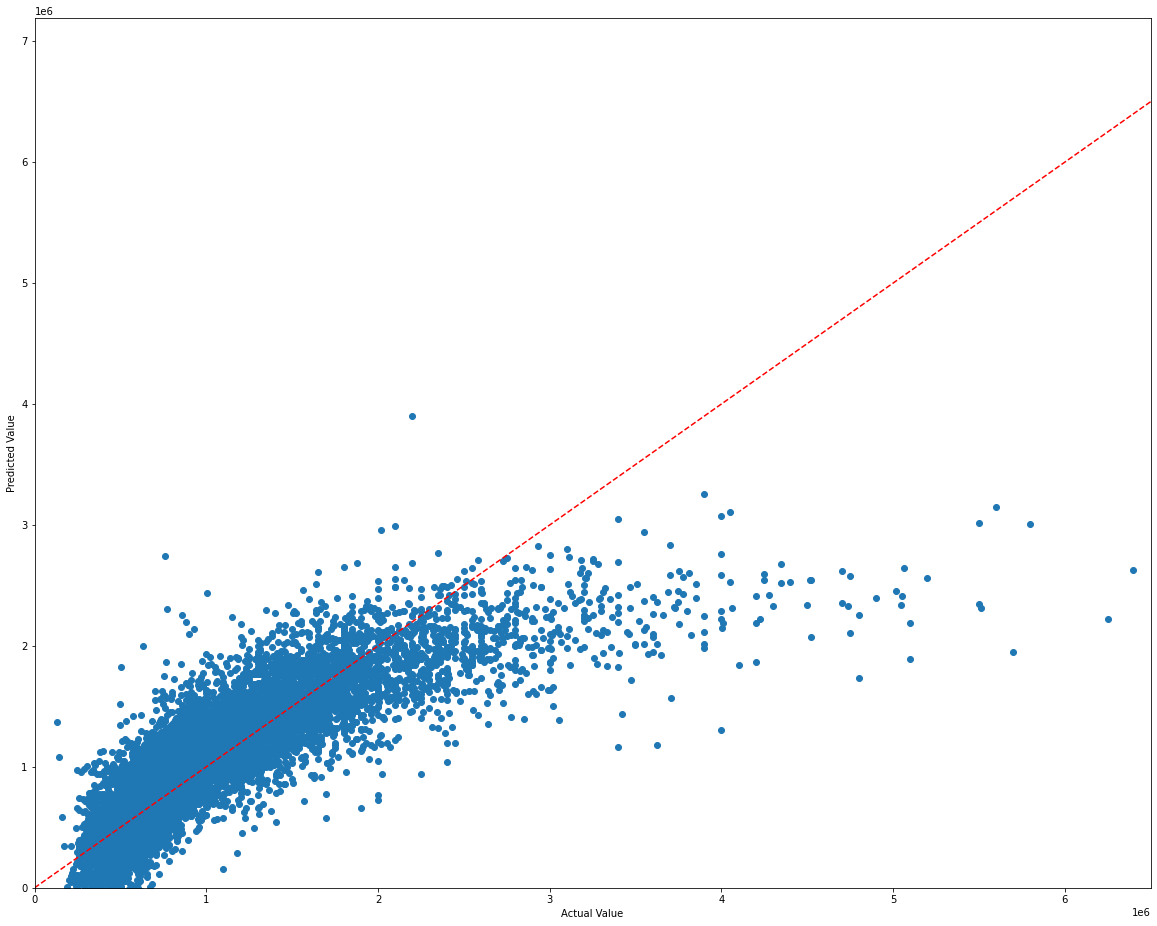

In [46]:
fig, ax = plt.subplots(figsize=(20,16))
ax.scatter(y_train, best_model.predict(X_train_scaled))
ax.plot([0,8000000],[0,8000000],linestyle="--",color="red")
ax.set_xlabel('Actual Value')
ax.set_ylabel('Predicted Value')
ax.set_xlim(0, max(y_test))
ax.set_ylim(0, max(y_pred) + 100000)

In [47]:
best_model.coef_

array([ 1.43997017e+05, -2.06811111e+05,  2.40794548e+04,  1.24448732e+05,
        4.90086467e+04,  1.66975528e+04,  4.91859867e+03, -6.40883824e+04,
       -9.02815198e+04, -1.84206298e+04,  5.67184719e+03, -2.63154295e+04,
        1.50338281e+05,  6.17984193e+04, -9.66240126e+00,  5.48551429e+04,
        1.04609344e+05,  1.39913773e+05,  4.78836478e+04, -1.69215360e+04,
       -8.09905950e+04, -4.05424917e+04,  9.14025397e+04,  4.00169198e+04,
        1.68183143e+05, -1.67449680e+05, -1.12987585e+04, -1.45936415e+05,
       -1.62947239e+04, -3.01284982e+04,  2.12674875e+04, -1.10918902e+05,
        2.52533269e+05,  1.08070919e+05, -2.58351873e+04, -2.27714961e+04,
        6.83184244e+04,  0.00000000e+00,  7.45564144e+04,  3.19294403e+03,
       -6.62523594e+04, -1.18164400e+05, -7.25070150e+04,  2.08137199e+04,
        8.35492023e+04, -3.74827199e+04, -3.87065534e+04,  7.80451711e+04,
       -1.10904718e+04,  9.71750239e+04, -6.79110350e+04,  4.50415865e+04,
        2.44256896e+05, -

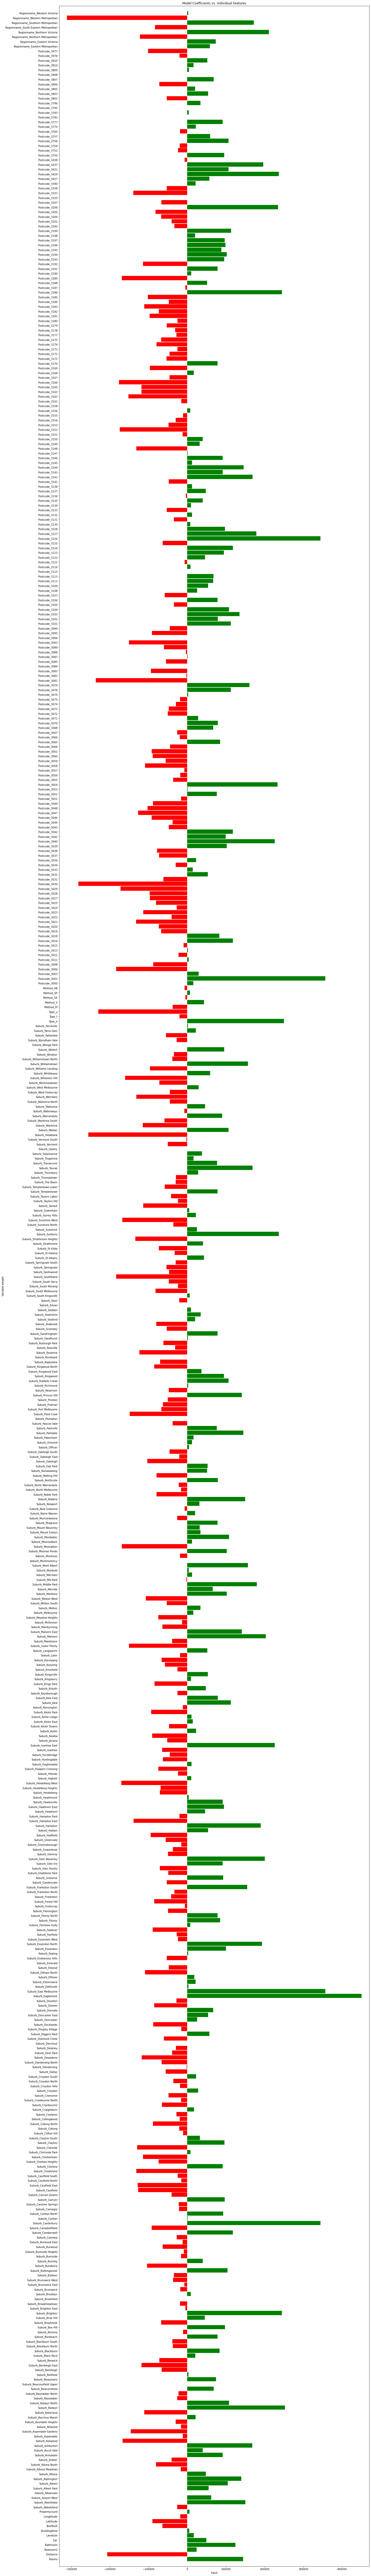

In [48]:
fig = plt.figure(figsize = (20, 140)) 
  
coef_colors = []

coefs = best_model.coef_

for i in coefs:
        if i > 0:
                coef_colors.append('green')
        else:
                coef_colors.append('red')

plt.barh(list(X_train), coefs, color = coef_colors, height=0.9)
  
plt.xlabel("Input") 
plt.ylabel("Variable weight") 
plt.title("Model Coefficients vs. Individual Features")

plt.margins(y=0.002)

plt.xlim(min(coefs) - 20000, max(coefs) + 20000)

plt.tight_layout()
plt.tight_layout(pad=0.05)

plt.savefig('MelbournePriceDatavsFeature.jpg')

plt.show() 